# Configuración Inicial

In [0]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

# Bi-Gramas

- Parejas de palabras que ocurren consecutivas

In [0]:
md_bigrams = list(bigrams(text1))

# Distribución de probabilidades
fdist = FreqDist(md_bigrams)

In [3]:
# Podemos obtener los bi-gramas más frecuentes en este texto
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

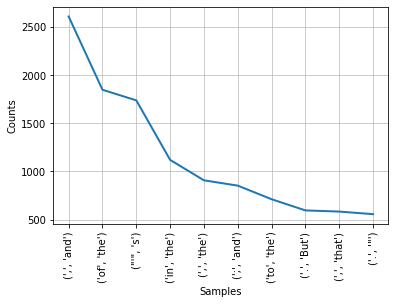

In [4]:
fdist.plot(10)

# Filtrado de bi-gramas

- Sin embargo, observamos que los bigramas más comunes no representan realmente frases o estructuras léxicas de interes.
- Tal vez, aplicar algún tipo de filtro nos permite ver estructuras más relevantes

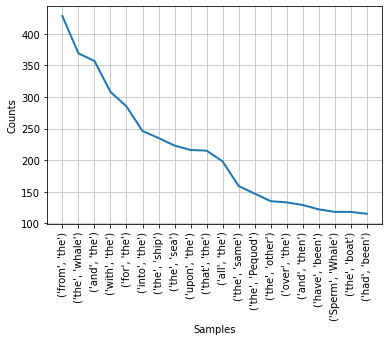

In [5]:
threshold = 2
filtered_bigrams = [bigrams for bigrams in md_bigrams if len(bigrams[0]) > threshold and len(bigrams[1]) > threshold]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

# Tri-gramas

In [6]:
from nltk.util import ngrams

md_trigrams = list(ngrams(text1, 3))
fdist = FreqDist(md_trigrams)
fdist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

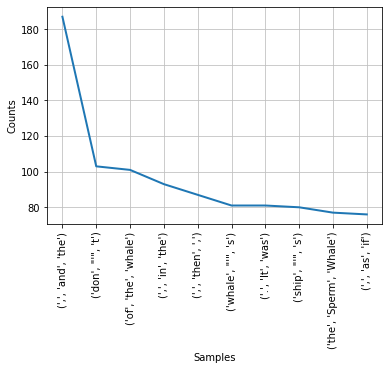

In [7]:
fdist.plot(10)

In [0]:
# Los n gramas en general son la base de muchos algoritmos del procesamiento del lenguaje natural. Son la base fundamental para construir algoritmos más sofisticados

# Colocations (Colocaciones)

- Son secuencias de palabras que suelen ocurrir en textos o conversaciones con una **frecuencia inusualmente alta** de NLTK doc
- Las colocaciones de una palabra son declaraciones formales de donde suele ubicarse típicamente esa palabra Maning 

In [0]:
md_bigrams = list(bigrams(text1))

threshold = 2
filtered_bigrams = [bigrams for bigrams in md_bigrams if len(bigrams[0]) > threshold and len(bigrams[1]) > threshold]
filtered_bigrams_dist = FreqDist(filtered_bigrams)

filtered_word = [word for word in text1 if len(word)> threshold] # Lista de palabras filtradas
filtered_word_dist = FreqDist(filtered_word)

# Entiende un DataFrame como una Hoja de cálculo en excel pero en python
df = pd.DataFrame()
df['bi_grams'] = list(set(filtered_bigrams)) # Una columna llamada 'bi_grams'
df['word_0'] = df['bi_grams'].apply(lambda x : x[0])  # Obtengo una tupla y regreso el elemento 1
df['word_1'] = df['bi_grams'].apply(lambda x : x[1])
df['bi_gram_freq'] = df['bi_grams'].apply(lambda x : filtered_bigrams_dist[x])
df['word_0_freq'] = df['word_0'].apply(lambda x : filtered_word_dist[x])
df['word_1_freq'] = df['word_1'].apply(lambda x : filtered_word_dist[x])

In [10]:
df

bi_grams        word_0  ... word_0_freq  word_1_freq
0            (ancestry, and)      ancestry  ...           2         6024
1      (indifference, views)  indifference  ...           7            3
2             (reason, upon)        reason  ...          64          538
3              (within, two)        within  ...          78          285
4               (held, long)          held  ...          37          318
...                      ...           ...  ...         ...          ...
67937        (assigned, the)      assigned  ...           3        13721
67938           (his, armed)           his  ...        2459           15
67939         (loud, splash)          loud  ...          12            2
67940       (towards, Peleg)       towards  ...         107           74
67941          (stars, that)         stars  ...          12         2982

[67942 rows x 6 columns]

# Pointwise Mutual Information (PMI)

Una métrica basada en _teoría de la información_ para encontrar **collocactions**

In [0]:
df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(lambda x: np.log2(x.values[0] / (x.values[1]*x.values[2])), axis=1 )
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))

In [12]:
df

bi_grams        word_0  ...        PMI  log(bi_gram_freq)
0            (ancestry, and)      ancestry  ... -12.556506                1.0
1      (indifference, views)  indifference  ...  -4.392317                0.0
2             (reason, upon)        reason  ... -15.071462                0.0
3              (within, two)        within  ... -14.440220                0.0
4               (held, long)          held  ... -13.522336                0.0
...                      ...           ...  ...        ...                ...
67937        (assigned, the)      assigned  ... -15.329061                0.0
67938           (his, armed)           his  ... -15.170747                0.0
67939         (loud, splash)          loud  ...  -4.584963                0.0
67940       (towards, Peleg)       towards  ... -12.950920                0.0
67941          (stars, that)         stars  ... -15.127027                0.0

[67942 rows x 8 columns]

In [13]:
df.sort_values(by = 'PMI', ascending=False)

bi_grams    word_0  ...        PMI  log(bi_gram_freq)
60327        (Childe, Harold)    Childe  ...   0.000000                0.0
1214          (IMPOSING, WAY)  IMPOSING  ...   0.000000                0.0
37366  (needing, supervision)   needing  ...   0.000000                0.0
3538          (lege, naturae)      lege  ...   0.000000                0.0
62653        (Hampton, Court)   Hampton  ...   0.000000                0.0
...                       ...       ...  ...        ...                ...
32784              (man, the)       man  ... -22.732783                0.0
54350             (some, the)      some  ... -22.919024                0.0
33599              (one, the)       one  ... -23.540138                0.0
16503              (the, not)       the  ... -23.851315                0.0
51560              (the, but)       the  ... -23.864336                0.0

[67942 rows x 8 columns]

In [15]:
# Gráfico interactivo (Gráfico de dispersión)
fig = px.scatter(x = df['PMI'].values, y = df['log(bi_gram_freq)'] , color = df['PMI']+df['log(bi_gram_freq)'], 
                 hover_name= df['bi_grams'].values, width=600 , height=600 , labels= {'x': 'PMI', 'y': 'Log(Bigram Frecuency)'})
fig.show()

# Medidas pre-construidas en NLTK

In [0]:
# Ver documentacipon metrics/association.html de nltk
from nltk.collocations import *
bigram_measure = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text1)

In [18]:
# Encontrar colocaciones nos permiten ubicar nombres propios, lugrares importantes, entre otros
finder.apply_freq_filter(20)
finder.nbest(bigram_measure.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

# Textos en Español

In [21]:
# Descargamos el corpues en español
nltk.download('cess_esp')
corpus = nltk.corpus.cess_esp.sents()
flatten_corpus = [word for l in corpus for word in l]
print(flatten_corpus[:20])

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana']


In [22]:
finder = BigramCollocationFinder.from_documents(corpus)
finder.apply_freq_filter(10)
finder.nbest(bigram_measure.pmi, 10)

[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]